In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Primer sistema de ecuaciones

In [2]:
G=(lambda x1,x2: np.log(x1**2+x2**2)-np.sin(x1*x2)-np.log(2)-np.log(np.pi), \
   lambda x1,x2: np.exp(x1-x2) + np.cos(x1*x2))

In [3]:
def GetVectorF(G,r):
    dim = len(G)    
    v = np.zeros(dim)
    if len(r)==2:
        for i in range(dim):
            v[i] = G[i](r[0],r[1])
    elif len(r)==3:
        for i in range(dim):
            v[i] = G[i](r[0],r[1],r[2])
    return v

In [4]:
def GetJacobian(G,r,h=1e-6):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (  G[i](r[0]+h,r[1]) - G[i](r[0]-h,r[1]) )/(2*h)
        J[i,1] = (  G[i](r[0],r[1]+h) - G[i](r[0],r[1]-h) )/(2*h)
        
    return J.T

In [5]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return 0.5*np.linalg.norm(v)**2

In [6]:
def GetFig(F,R,it):
    
    fig = plt.figure(figsize=(8,4))
    
    labels = ['X','Y']
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()

In [7]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    d = 1
    it = 0
    Vector_F = np.array([])
    R_vector = np.array(r)
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        J = GetJacobian(G,r)
        GVector = GetVectorF(G,r)
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        R_vector = np.vstack((R_vector,r))
        NewF = GetMetric(G,r)
        Vector_F = np.append(Vector_F,NewF)
        d = np.abs( CurrentF - NewF )/NewF

        it += 1
        
    if it == epochs:
        print(' Entrenamiento no completado ')
    
    GetFig(Vector_F,R_vector,it-1)    
    return r,it

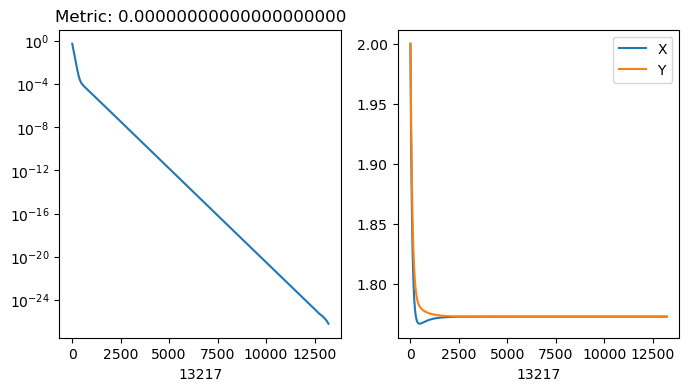

In [8]:
xsol,it = GetSolve(G,[2,2])

In [9]:
xsol

array([1.77245385, 1.77245385])

##### Segundo sistema de ecuaciones

In [10]:
G2=(lambda x1,x2,x3: 6*x1 - 2*np.cos(x3*x2) - 1, \
    lambda x1,x2,x3: 9*x2 + np.sqrt(x1**2+np.sin(x3)+1.06) +0.9, \
    lambda x1,x2,x3: 60*x3+3*np.exp(-x1*x2)+10*np.pi-3)

In [11]:
def GetJacobian2(G2,r2,h=1e-6):
    
    dim = len(G2)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (  G2[i](r2[0]+h,r2[1],r2[2]) - G2[i](r2[0]-h,r2[1],r2[2]) )/(2*h)
        J[i,1] = (  G2[i](r2[0],r2[1]+h,r2[2]) - G2[i](r2[0],r2[1]-h,r2[2]) )/(2*h)
        J[i,2] = (  G2[i](r2[0],r2[1],r2[2]+h) - G2[i](r2[0],r2[1],r2[2]-h) )/(2*h)
        
    return J.T

In [12]:
def GetFig2(F,R,it):
    
    fig = plt.figure(figsize=(8,4))
    
    labels = ['X','Y','Z']
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()

In [13]:
def GetSolve2(G2,r2,lr=1e-4,epochs=int(1e5),error=1e-7):
    d = 1
    it = 0
    Vector_F = np.array([])
    R_vector = np.array(r2)
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G2,r2)
        J = GetJacobian2(G2,r2)
        GVector = GetVectorF(G2,r2)
        #Machine Learning
        r2 -= lr*np.dot(J,GVector) 
        R_vector = np.vstack((R_vector,r2))
        NewF = GetMetric(G2,r2)
        Vector_F = np.append(Vector_F,NewF)
        d = np.abs( CurrentF - NewF )/NewF
        it += 1

    if it == epochs:
        print(' Entrenamiento no completado ')
        
    GetFig2(Vector_F,R_vector,it-1) 
    return r2,it

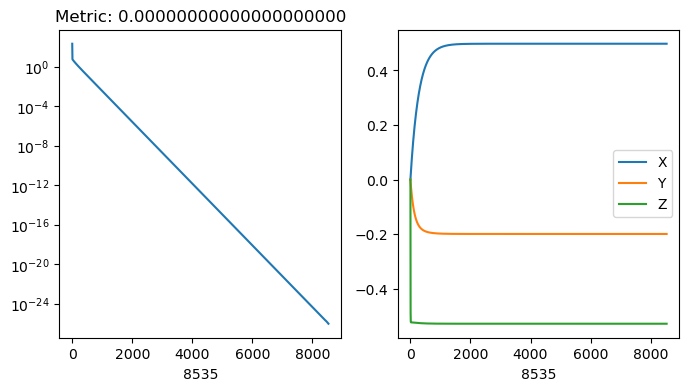

In [14]:
xsol,it= GetSolve2(G2,[0,0,0])

In [15]:
xsol

array([ 0.49814468, -0.1996059 , -0.52882598])